### Libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 1000)

### Pre-Processing

In [123]:
test = pd.read_csv('Datasets/test.csv')
train = pd.read_csv('Datasets/train.csv')

def preprocess(df,dataset):
    df.rename(columns={'Sex':'Male','Pclass':'Ticket Class','SibSp':'No. Siblings/Spouses','Parch':'No. Parents/Children',
                       'Ticket':'Ticket No.','Fare':'Fare Price','Cabin':'Cabin no.','Embarked':'Port Embarked'},inplace=True)
    df['Male'] = df['Male'].apply(lambda x: 1 if x == 'male' else 0)
    df['Port Embarked'] = df['Port Embarked'].fillna(df['Port Embarked'].mode()[0])
    df['Title'] = df['Name'].apply(lambda x: x[x.find(',')+2:x.find('.')+1])
    df['Fare Price'] = df['Fare Price'].fillna(df.loc[df['Ticket Class'] == 3,'Fare Price'].mean())

    df.drop(['Cabin no.','Ticket No.','Name'],axis=1,inplace=True)

    return df

test = preprocess(test,'test')
train = preprocess(train,'train')

### EDA

In [124]:
print('Test dataset')       
display(test.info())
display(test.describe())

print('Train dataset')
display(train.info())
display(train.describe())

Test dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           418 non-null    int64  
 1   Ticket Class          418 non-null    int64  
 2   Male                  418 non-null    int64  
 3   Age                   332 non-null    float64
 4   No. Siblings/Spouses  418 non-null    int64  
 5   No. Parents/Children  418 non-null    int64  
 6   Fare Price            418 non-null    float64
 7   Port Embarked         418 non-null    object 
 8   Title                 418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


None

,PassengerId,Ticket Class,Male,Age,No. Siblings/Spouses,No. Parents/Children,Fare Price
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.571764
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.851997
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


Train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           891 non-null    int64  
 1   Survived              891 non-null    int64  
 2   Ticket Class          891 non-null    int64  
 3   Male                  891 non-null    int64  
 4   Age                   714 non-null    float64
 5   No. Siblings/Spouses  891 non-null    int64  
 6   No. Parents/Children  891 non-null    int64  
 7   Fare Price            891 non-null    float64
 8   Port Embarked         891 non-null    object 
 9   Title                 891 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


None

,PassengerId,Survived,Ticket Class,Male,Age,No. Siblings/Spouses,No. Parents/Children,Fare Price
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


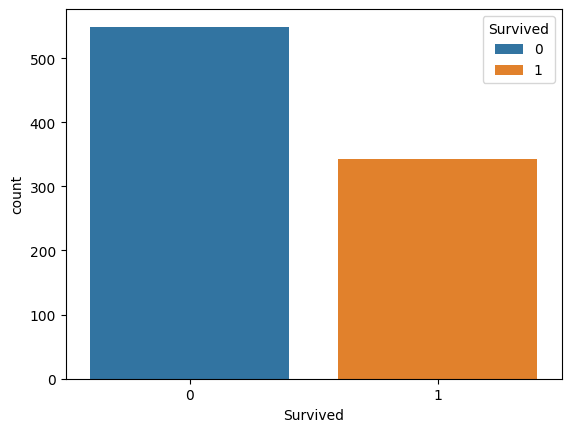

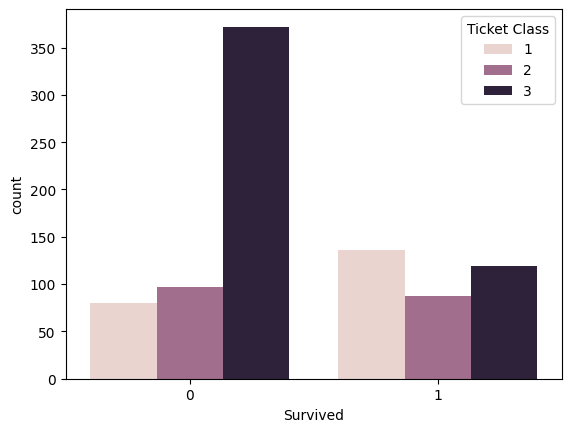

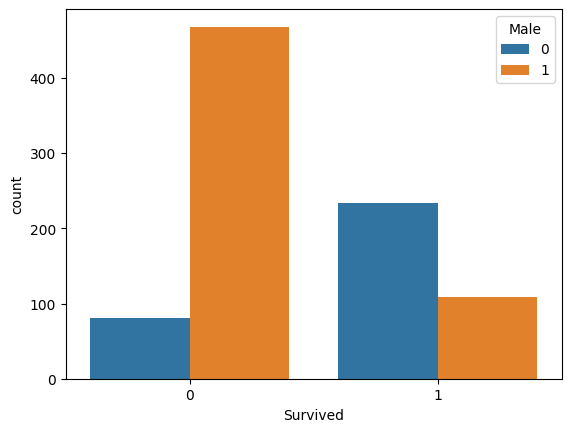

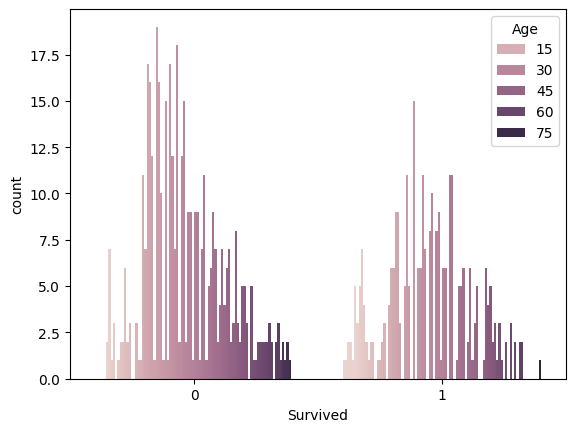

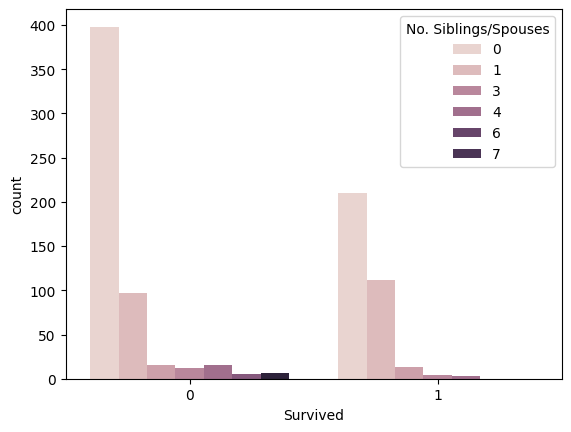

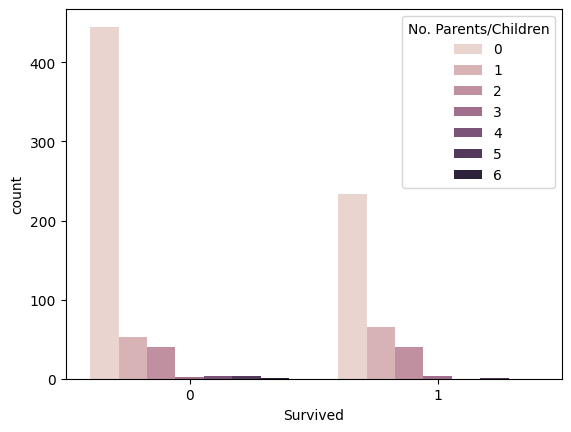

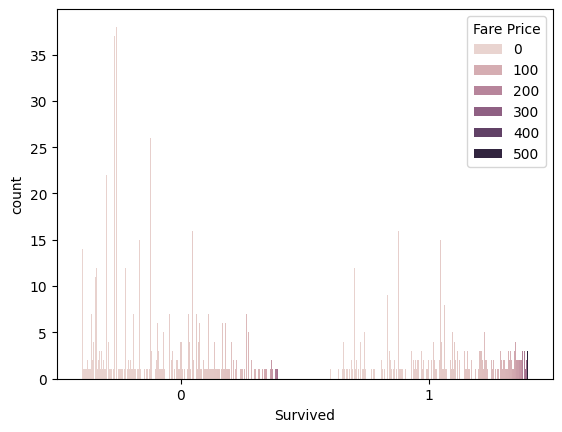

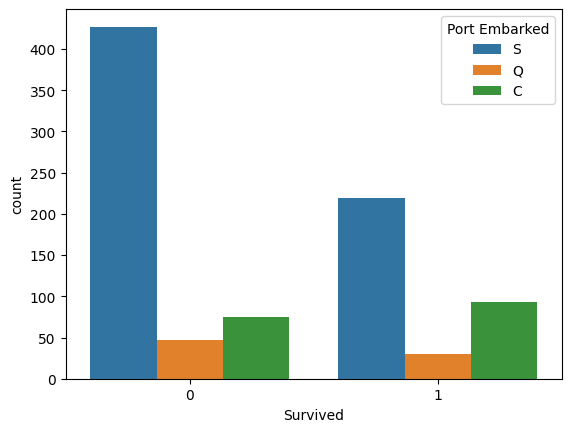

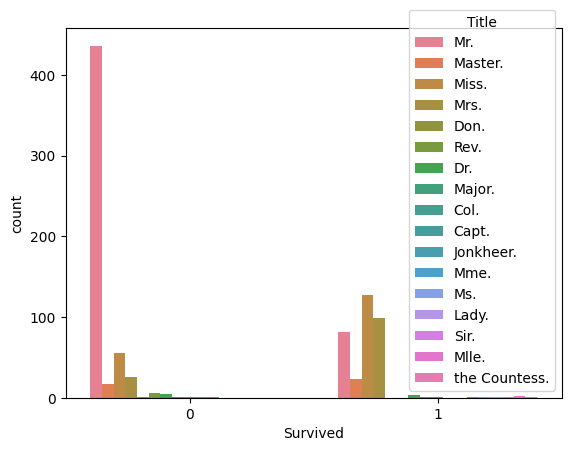

In [105]:
for column in train.columns.tolist()[1:]:
    sns.countplot(data=train,x='Survived',hue=column)
    plt.show()

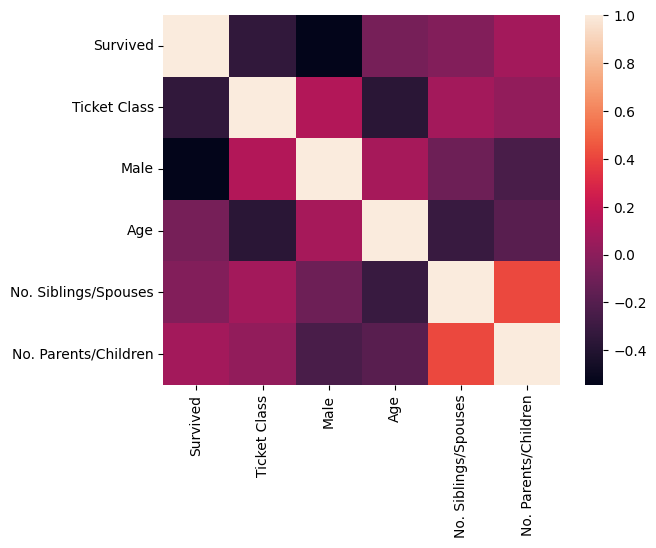

,Survived,Ticket Class,Male,Age,No. Siblings/Spouses,No. Parents/Children
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629
Ticket Class,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443
Male,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119
No. Siblings/Spouses,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838
No. Parents/Children,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000


In [106]:
correlate = train[['Survived','Ticket Class','Male','Age','No. Siblings/Spouses','No. Parents/Children']].corr()
sns.heatmap(data=correlate)
plt.show()
correlate

### K-Nearest Neighbors

In [107]:
X_train = train[['Ticket Class','Male']]
y_train = train['Survived']
X_test = test[['Ticket Class','Male']]

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})\
    .to_csv(r'C:\Users\Lucas\Python-Projects\Kaggle\Titanic-Machine-Learning-from-Disaster\Submissions\KNN_3.csv',index=False)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})\
    .to_csv(r'C:\Users\Lucas\Python-Projects\Kaggle\Titanic-Machine-Learning-from-Disaster\Submissions\KNN_5.csv',index=False)

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})\
    .to_csv(r'C:\Users\Lucas\Python-Projects\Kaggle\Titanic-Machine-Learning-from-Disaster\Submissions\KNN_7.csv',index=False)

### Logistic Regression

In [128]:
X_train = train[['Ticket Class','Male']]
y_train = train['Survived']
X_test = test[['Ticket Class','Male']]
preprocesser = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),['Ticket Class'])],remainder='passthrough')
pipeline = Pipeline([('preprocesser',preprocesser),('classifier',LogisticRegression())])
pipeline.fit(X_train,y_train)
prediction = pipeline.predict(X_test)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})\
    .to_csv(r'C:\Users\Lucas\Python-Projects\Kaggle\Titanic-Machine-Learning-from-Disaster\Submissions\logreg_ticketclass_gender.csv',index=False)

X_train = train[['Fare Price','Male']]
y_train = train['Survived']
X_test = test[['Fare Price','Male']]
clf = LogisticRegression()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})\
    .to_csv(r'C:\Users\Lucas\Python-Projects\Kaggle\Titanic-Machine-Learning-from-Disaster\Submissions\logreg_ticketprice_gender.csv',index=False)

X_train = train[['Ticket Class','Male','No. Parents/Children']]
y_train = train['Survived']
X_test = test[['Ticket Class','Male','No. Parents/Children']]
preprocesser = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),['Ticket Class'])],remainder='passthrough')
pipeline = Pipeline([('preprocesser',preprocesser),('classifier',LogisticRegression())])
pipeline.fit(X_train,y_train)
prediction = pipeline.predict(X_test)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})\
    .to_csv(r'C:\Users\Lucas\Python-Projects\Kaggle\Titanic-Machine-Learning-from-Disaster\Submissions\logreg_genderchildrenclass.csv',index=False)

X_train = train[['Ticket Class','Male','No. Parents/Children','No. Siblings/Spouses']]
y_train = train['Survived']
X_test = test[['Ticket Class','Male','No. Parents/Children','No. Siblings/Spouses']]
preprocesser = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),['Ticket Class'])],remainder='passthrough')
pipeline = Pipeline([('preprocesser',preprocesser),('classifier',LogisticRegression())])
pipeline.fit(X_train,y_train)
prediction = pipeline.predict(X_test)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})\
    .to_csv(r'C:\Users\Lucas\Python-Projects\Kaggle\Titanic-Machine-Learning-from-Disaster\Submissions\logreg_genderchildrenclassspouses.csv',index=False)